In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

plt.style.use

<function matplotlib.style.core.use(style)>

#### Upload the data

In [115]:
## Convert csv to parquet format to reduce dimension
## This is done once to load the data
# df = pd.read_csv("../../data/eda/flights/flight_data_082022/flight_data_082022.csv", low_memory=False)
# df.to_parquet("../../data/eda/flights/flight_data_082022/flight_data_082022.parquet",engine='fastparquet')

df_flights = pd.read_parquet("../../data/eda/flights/flight_data_082022/flight_data_082022.parquet")
## clean the data by removing spaces
df_flights= df_flights.rename(columns={'Operating_Airline ' : 'Operating_Airline'})

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\jenni\.virtualenvs\georgetown_capstone-1Fa6Wwg2\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\jenni\AppData\Local\Temp\ipykernel_9624\4098034170.py", line 8, in <module>
    df_flights= df_flights.rename(columns={'Operating_Airline ' : 'Operating_Airline'})
  File "c:\Users\jenni\.virtualenvs\georgetown_capstone-1Fa6Wwg2\lib\site-packages\pandas\core\frame.py", line 5562, in rename
    return super()._rename(
  File "c:\Users\jenni\.virtualenvs\georgetown_capstone-1Fa6Wwg2\lib\site-packages\pandas\core\generic.py", line 1077, in _rename
    result = self if inplace else self.copy(deep=copy)
  File "c:\Users\jenni\.virtualenvs\georgetown_capstone-1Fa6Wwg2\lib\site-packages\pandas\core\generic.py", line 6368, in copy
    data = self._mgr.copy(deep=deep)
  File "c:\Users\jenni\.virtualenvs\georgetown_capstone-1Fa6Wwg2\lib\site-packages\pa

In [116]:
[x for x in df_flights.columns]

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Originally_Scheduled_Code_Share_Airline',
 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
 'IATA_Code_Originally_Scheduled_Code_Share_Airline',
 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
 'Operating_Airline ',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 '

In [117]:
df_flights.shape

(613649, 120)

In [118]:
df_flights.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


#### Analysis of Features
Identification of Potential Features 
- Time Series Features:
    'Year',
    'Quarter',
    'Month',
    'DayofMonth',
    'DayOfWeek',
    'FlightDate',
- Flight Info:
    - Airline: Marketing_Airline_Network
    - Origin: Origin, OriginCityName
    - Destination: Dest, DestCityName
- Departure / Delay Info:
    - CRSDepTime: Scheduled Departure
    - DepTime: Actual Departure
    - DepDelay: Departure Delay

In [119]:
[c for c in df_flights.columns]

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Originally_Scheduled_Code_Share_Airline',
 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
 'IATA_Code_Originally_Scheduled_Code_Share_Airline',
 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
 'Operating_Airline ',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 '

#### Delays by Airline in August 2022

In [120]:
airline_csv = "https://raw.githubusercontent.com/jenbam/airlines/master/data-raw/airlines.csv"
airlines = pd.read_csv(airline_csv)
## save locally
#airlines.to_csv("airlines.csv") 
#airlines.query("Code == '9E'")


In [121]:
airline_counts=df_flights["Operating_Airline"].value_counts()
airline_counts.head()

KeyError: 'Operating_Airline'

In [ ]:
airline_counts=df_flights["Operating_Airline"].value_counts()
airline_counts
airline_counts.index=airline_counts.index.map(
    airlines.set_index('Code')['Description'])

<AxesSubplot: >

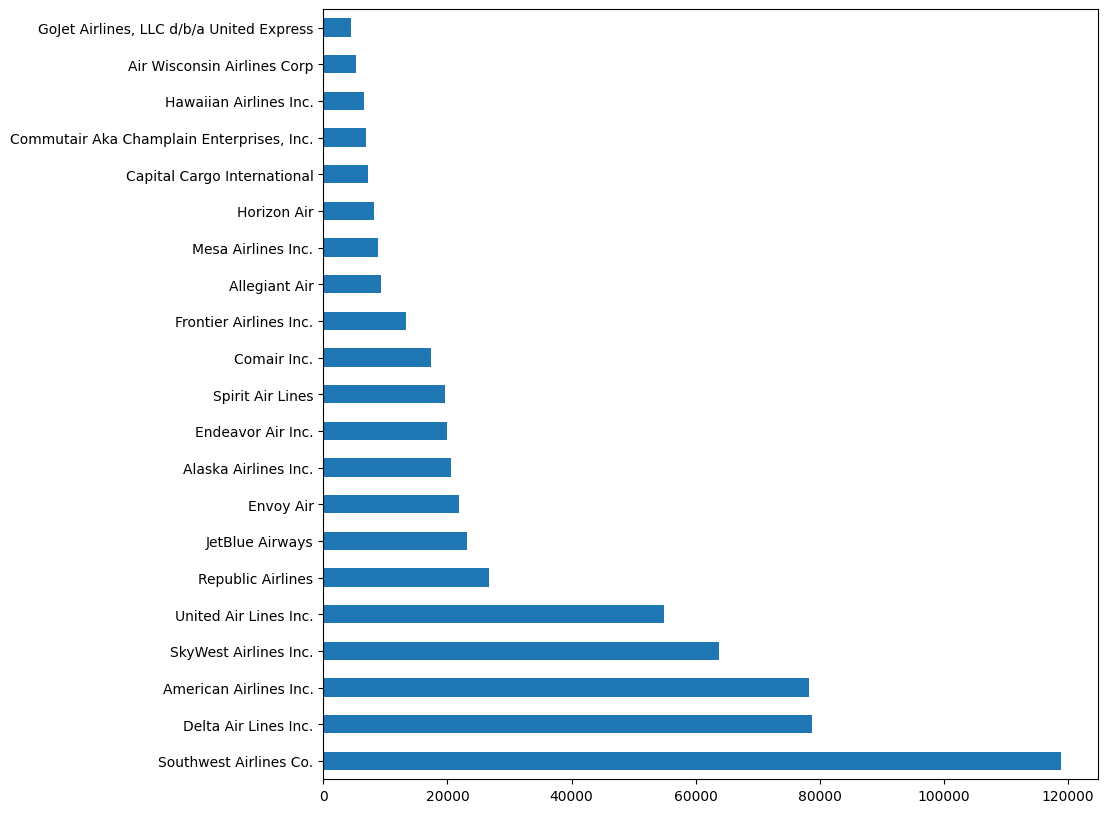

In [ ]:
airline_counts.plot(kind='barh', figsize=(10,10))

<AxesSubplot: >

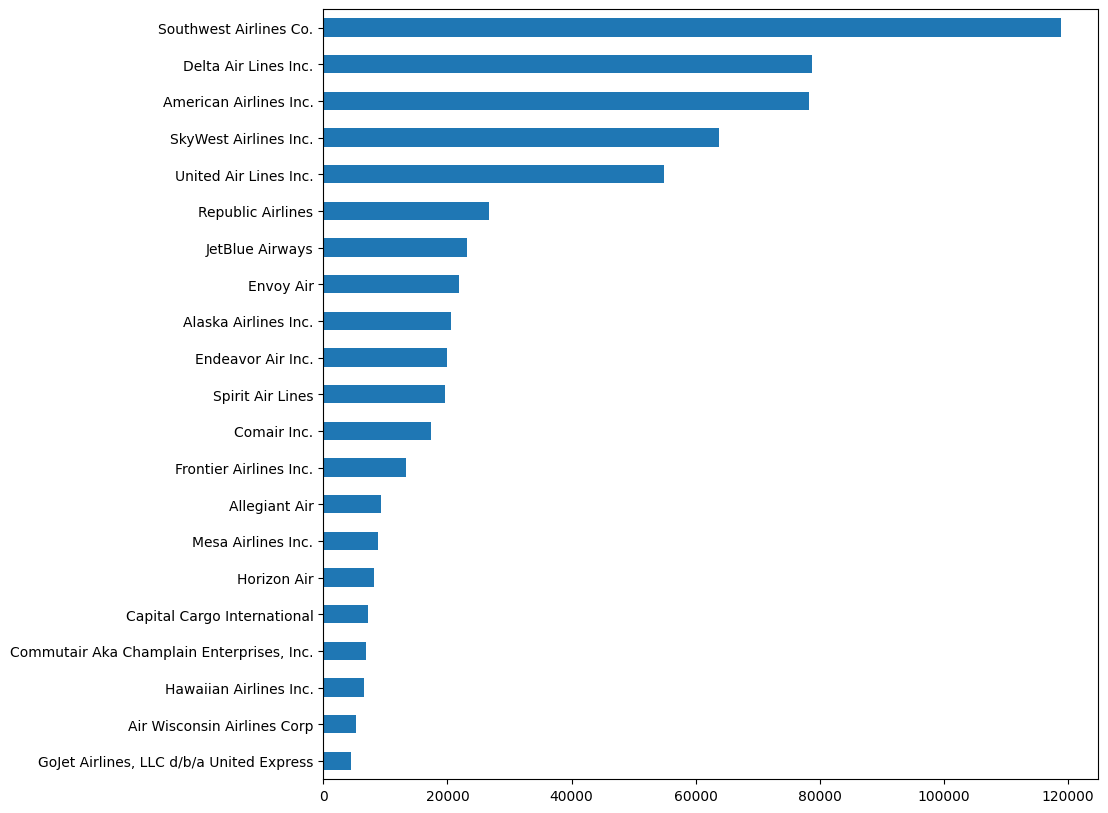

In [ ]:
airline_counts.sort_values(ascending=True).plot(kind='barh', figsize=(10,10))

In [ ]:
df_flights.query('Year == 2022').head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2022,3,8,17,3,2022-08-17,WN,WN,19393,WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [ ]:
px.bar(airline_counts.sort_values(ascending=True), template="plotly_dark", orientation='h')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=Operating_Airline<br>value=%{x}<br>index=%{y}<extra></extra>',
              'legendgroup': 'Operating_Airline',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Operating_Airline',
              'offsetgroup': 'Operating_Airline',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([  4517,   5352,   6514,   6831,   7139,   8246,   8887,   9282,  13337,
                           17392,  19581,  19893,  20514,  21858,  23100,  26686,  54918,  63713,
                           78327,  78673, 118889], dtype=int64),
              'xaxis': 'x',
              'y': array(['GoJet Airlines, LLC d/b/a United Express',
                          'Air Wisconsin Airlines Corp', 'Hawaiian Airlines Inc.',
                          'Commutair Aka Champlain Enterprises, Inc.',
                          'Capital Cargo International', 'Horizon Air', 'Mesa Airlines Inc.',
                          'Allegiant Air', 'Frontier Airlines Inc.', 'Comair Inc.',
                          'Spirit Air Lines', 'Endeavor Air Inc.', 'Alaska Airlines Inc.',
                          'Envoy Air', 'JetBlue Airways', 'Republic Airlines',
                          'United Air Lines Inc.', 'SkyWest Airlines Inc.',
                          'American Airlines Inc.', 'Delta Air Lines Inc.',
                          'Southwest Airlines Co.'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'value'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'index'}}}
})